In [3]:
import numpy as np
import pandas as pd
from IPython.display import Image, display

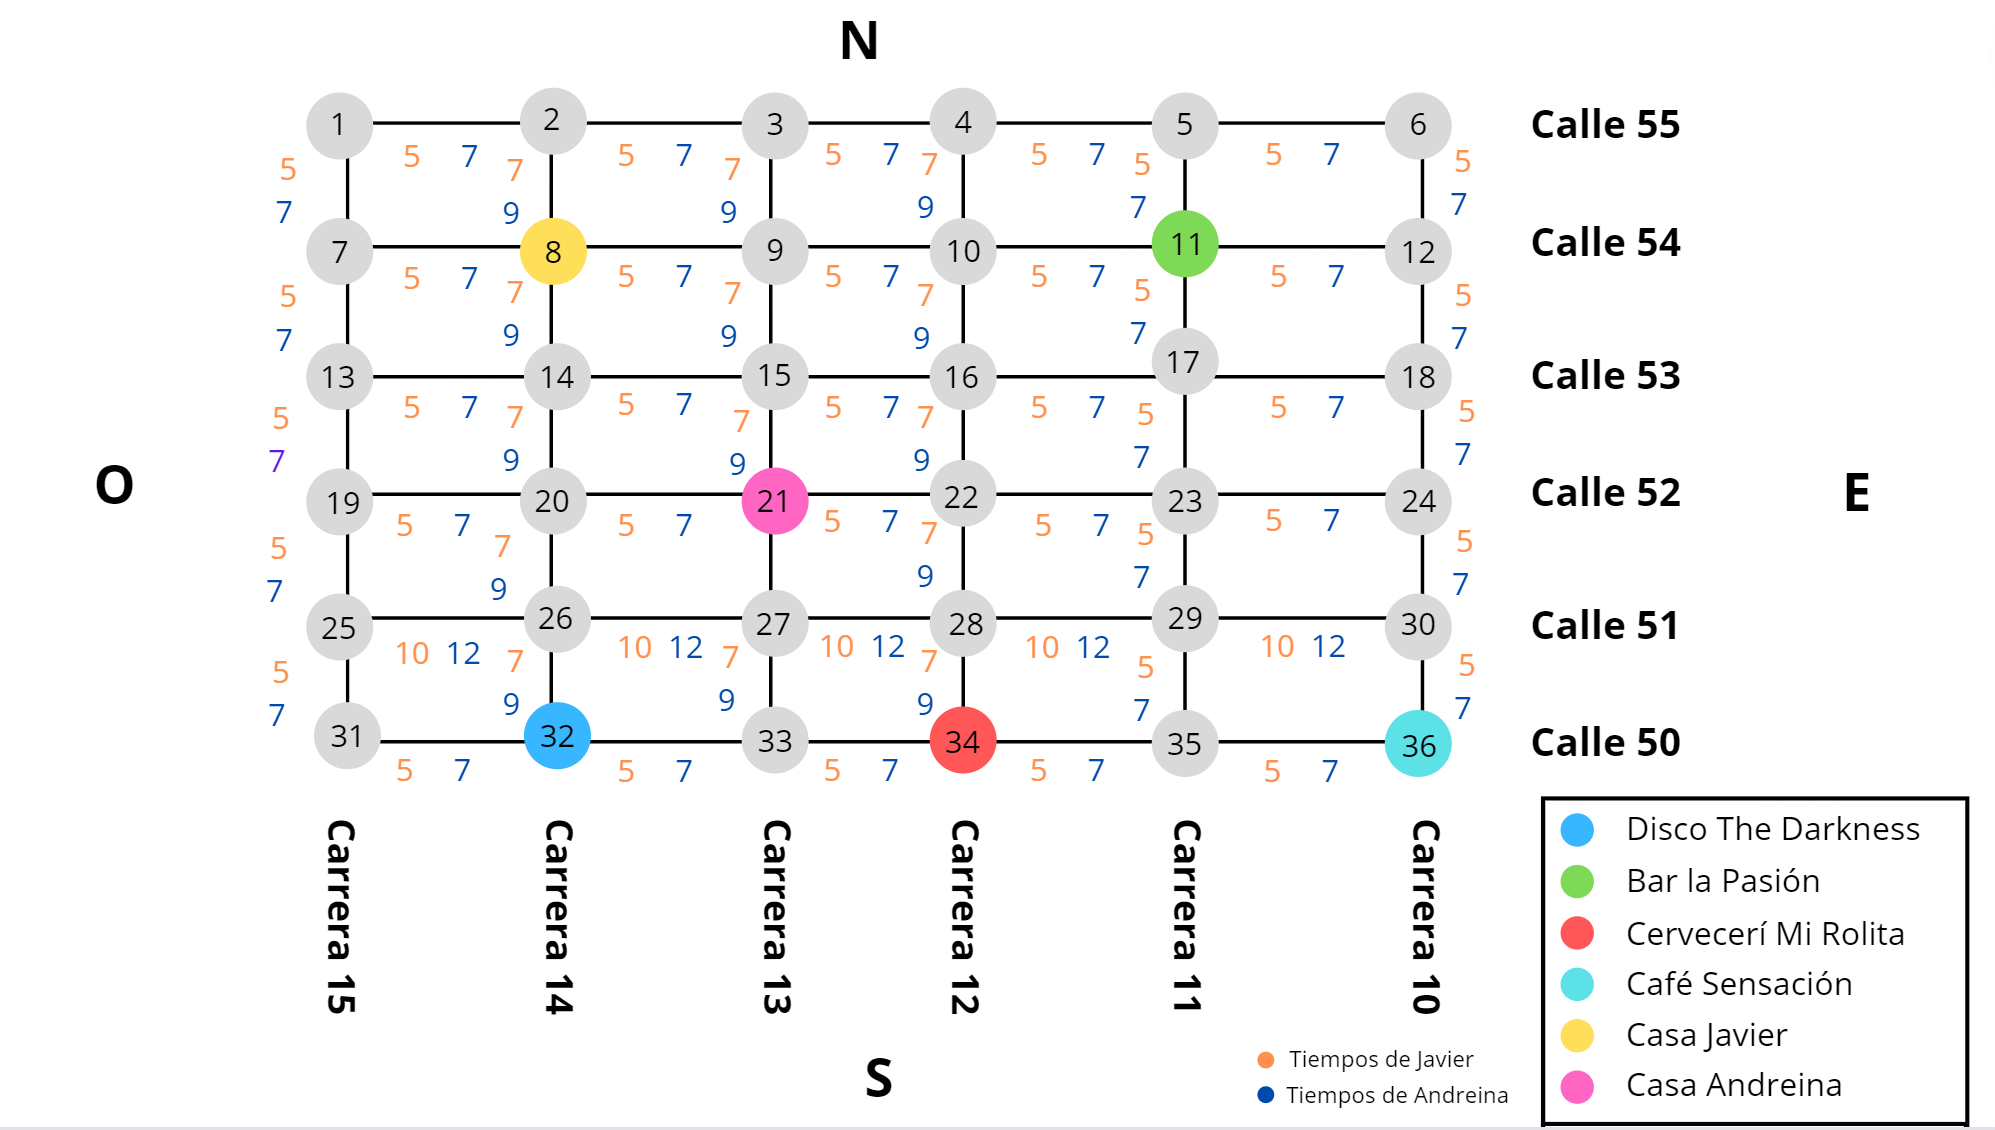

Proyecto Modelación de Sistema de Redes 
Integrantes: Isabella Abeledo, Luis Manzur y Simón Meza


----------Si el lugar de encuentro es Disco The Darkness----------
El tiempo y los caminos que tomaron Javier y Adreina fueron: 
Javier tardo  28  minutos al Disco The Darkness: [8, 14, 20, 26, 32]
andreina tardo  25  minutos al Disco The Darkness: [21, 27, 33, 32]
El equipo le aconseja a la pareja que:
Javier debe salir  3  minutos antes que Andreina
Ya que el tiempo de la pareja para llegar al local y encontrarse será: 28 minutos


----------Si el lugar de encuentro es Bar La Pasion----------
El tiempo y los caminos que tomaron Javier y Adreina fueron: 
Javier tardo  15  minutos al Bar La Pasion: [8, 9, 10, 11]
andreina tardo  28  minutos al Bar La Pasion: [21, 22, 23, 17, 11]
El equipo le aconseja a la pareja que:
Andreina debe salir  13  minutos antes que Javier
Ya que el tiempo de la pareja para llegar al local y encontrarse será: 28 minutos


----------Si el lugar de encuentro es Cerveceria Mi Rolita----------
El tiempo y los caminos que tomaron Javier y Adreina fueron: 
Javier t

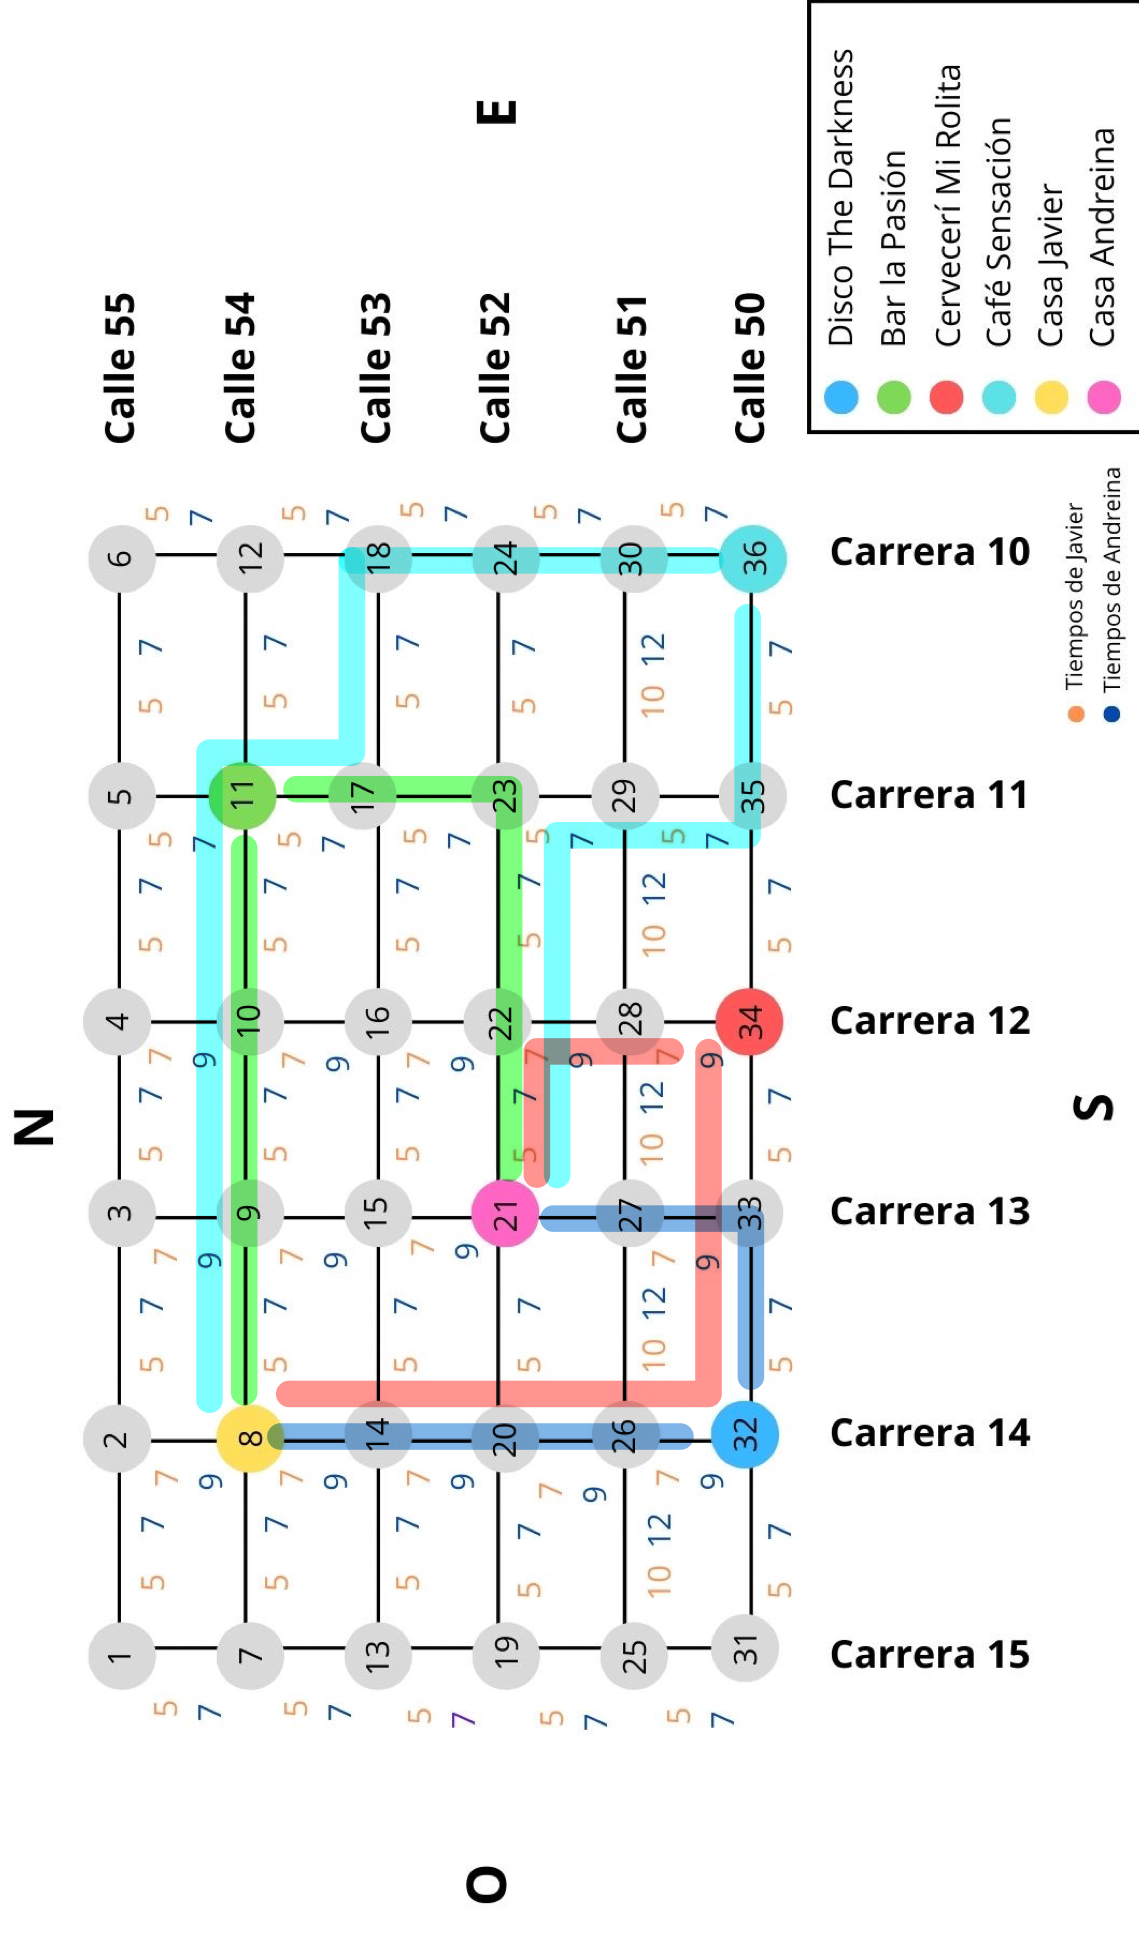

In [4]:
# Leer archivo
javier_data_frame = pd.read_excel("matriz_ady_javier.xlsx")
andreina_data_frame = pd.read_excel("matriz_ady_andreina.xlsx")

# Ensamblar la matriz usando el dataframe del archivo
andreina_a_m = []
javier_a_m = []

image_path = "GrafoCaminos.jpg"  # Change this to the actual path of your image


for i in range(37):
    andreina_a_m.append(andreina_data_frame[i + 1].tolist())
    javier_a_m.append(javier_data_frame[i + 1].tolist())


# Construir Tabla
def build_table(iter):
    # Leer archivo
    if iter == 0:
        data_frame2 = pd.read_excel("table_javier.xlsx")
    elif iter == 1:
        data_frame2 = pd.read_excel("table_andreina.xlsx")

    # nodo - visitado - time min desde el origen - predecesor
    table = []

    for i in range(37):
        table.append(data_frame2[i + 1].tolist())

    table = np.array(table)

    # print(table)
    return table


# Algoritmo de Dijkstra
def dijkstra(table, iter):
    stack = [1]  # inicializar stack en la que se saveán los nodos que se deben visitar

    if iter == 0:
        a_m = javier_a_m
    else:
        a_m = andreina_a_m

    while stack:
        v = stack.pop()  # sacar primer elemento de la stack

        for ady_node in range(len(a_m[v - 1])):
            if a_m[v - 1][ady_node] != 0 and table[v - 1, 1] == 0:
                if table[v - 1, 2] + a_m[v - 1][ady_node] < table[ady_node, 2]:
                    table[ady_node, 2] = table[v - 1, 2] + a_m[v - 1][ady_node]
                    table[ady_node, 3] = v
        table[v - 1, 1] = 1
        # print(table, '\n--Fin de la table de iteracion--')

        not_visited = np.where(table[:, 1] == 0)
        if len(not_visited[0]) > 0:
            nv_row = [i for i in not_visited[0]]
            dist_min = min(table[nv_row, 2])
            for i in range(len(table)):
                if table[i][2] == dist_min and table[i][1] == 0:
                    nodo = table[i][0]
            stack.append(nodo)


def undirected_dijkstra(table, route_taken, init_node, destination_node, iter):
    # Ahora esta stack comienza en el destino, no en uno porque estamos buscando un route especifico
    stack = [destination_node]
    # Declaramos una variable auxiliar que nos ayde a recorrer el route de javier
    # aux = 0
    complete_path = 0
    node_to_go = True

    if iter == 0:
        a_m = javier_a_m
    else:
        a_m = andreina_a_m

    while stack:
        node_to_visit = stack.pop()
        # El range va desde el destino hasta el origen, nuevamente no tenemos que encontrar todas las rutas
        # for ady_node in range(destination_node, init_node):
        ady_node = destination_node
        complete_path = 0
        while complete_path < 1:
            if (
                a_m[node_to_visit - 1][ady_node] != 0
                and table[node_to_visit - 1, 1] == 0
            ):
                if (
                    table[node_to_visit - 1, 2] + a_m[node_to_visit - 1][ady_node]
                    < table[ady_node, 2]
                ):
                    # Booleano que se torna False si hay un choque entre Javier y Andreina
                    include = True
                    # Nuevo condicional que verifica que el no hay sido visitado por Javier

                    # Contempla el caso que el route de Javier es tan corto que no entra en el ciclo

                    # Recorre el route de Javier, asegurandonos que Andreina no chocara con el
                    for aux in range(len(route_taken)):
                        # print('nodo_a_visitar: ', nodo_a_visitar, ' camino_recorrido', camino_recorrido[aux+1])
                        if aux  < len(route_taken):
                            if node_to_visit == route_taken[aux]:
                            # print('Andreina se encontrara con Javier en ', camino_recorrido[aux+1])
                            # print('Andreina va a ', tabla[nodo_ady,0], ' mientras que Javier a ', camino_recorrido[aux])
                            # print('Nuevo nodo anadido: ', tabla[nodo_ady,0], ' | Viniendo de: ', tabla[nodo_ady,3])
                                include =False
                                # print('Descartando nodo porque ya fue visitado por Javier')

                    if include:
                        table[ady_node, 2] = (
                            table[node_to_visit - 1, 2]
                            + a_m[node_to_visit - 1][ady_node]
                        )
                        table[ady_node, 3] = node_to_visit

            if ady_node < len(a_m[0]) - 1:
                ady_node = ady_node + 1
            else:
                ady_node = 0
            if ady_node == destination_node:
                complete_path = complete_path + 1

        table[node_to_visit - 1, 1] = 1

        not_visited = np.where(
            table[:, 1] == 0
        )  # se buscan las filas en la table de los nodos que no han sido visitados
        if len(not_visited[0]) > 0:
            nv_row = [i for i in not_visited[0]]  # se guardan las filas
            dist_min = min(
                table[nv_row, 2]
            )  # se busca el time mínimo entre las filas obtenidas anteriormente
            cycle_iterator = destination_node
            node_to_go = True
            while node_to_go:
                if (
                    table[cycle_iterator][2] == dist_min
                    and table[cycle_iterator][1] == 0
                ):  # si el time en esa pos es el time min y el nodo no ha sido visitado
                    nodo = table[cycle_iterator][0]  # se guarda el nodo
                    stack.append(
                        nodo
                    )  # se agrega ese nodo a la stack y será el próxima a visitar

                if cycle_iterator == len(a_m[0]) - 1:
                    cycle_iterator = 0
                else:
                    cycle_iterator = cycle_iterator + 1

                if cycle_iterator == destination_node:
                    node_to_go = False


# Buscar el route
def look_for_route(a, b):
    class Person:
        def __init__(self, route, time):
            self.route = route
            self.time = time

    start, end, route, contiue_process, save = (
        a,
        b,
        [],
        True,
        True,
    ) 
    while contiue_process:
        row_end = np.where(table[:, 0] == end)  
        route.append(end)
        if save:
            time = table[
                row_end[0][0], 2
            ]
        save = False
        end = table[row_end[0][0], 3]  # ahora el final será el predecesor del nodo
        if (
            table[row_end, 0] == start or row_end == []
        ):  # si el nodo actual es el origen o la fila del nodo destino está vacía
            contiue_process = False  # se termina el bucle

    new_person = Person(route, time)

    return new_person


# Mostrar el resultado
def trip_plan(time_javier, recorrido_javier, time_andreina, recorrido_andreina):
    # Imprime en pantalla quien debe salir primero
    if time_javier > time_andreina:
        diferencia_time = time_javier - time_andreina
        print("Javier debe salir ", diferencia_time, " minutos antes que Andreina")
    elif time_javier == time_andreina:
        print("Javier y Andreina deben salir en el mismo momento")
    else:
        diferencia_time = time_andreina - time_javier
        print("Andreina debe salir ", diferencia_time, " minutos antes que Javier")
    max_recorrido = max(time_javier, time_andreina)
    print("Ya que el tiempo de la pareja para llegar al local y encontrarse será: " + str(max_recorrido) + " minutos")

    # Verifica que no hay routes compartidos
    if len(recorrido_javier) < len(recorrido_andreina):
        recorrido_menor = len(recorrido_javier)
    else:
        recorrido_menor = len(recorrido_andreina)

    # for i in range(recorrido_menor - 2):
    #   if recorrido_javier[i] == recorrido_andreina[i]:
    #     if recorrido_javier[i+1] == recorrido_andreina[i+1]
    #       print('Los routes se cruzan!')


# Ubicaciones
locations = [
    {"name": "Disco The Darkness", "node": 32},
    {"name": "Bar La Pasion", "node": 11},
    {"name": "Cerveceria Mi Rolita", "node": 34},
    {"name": "Café Sensación", "node": 36},
]
javier_house = 8
andreina_house = 21


for location in locations:
    # RECORRIDO JAVIER
    table = build_table(0)
    dijkstra(table, 0)
    javier_1 = look_for_route(javier_house, location["node"])

    # RECORRIDO ANDREINA
    table = build_table(1)
    undirected_dijkstra(table, javier_1.route, andreina_house, location["node"], 1)
    andreina_1 = look_for_route(
        andreina_house, location["node"]
    )  # Pasar el punto de inicio y el de llegada

    # RECORRIDO ANDREINA
    table = build_table(1)
    dijkstra(table, 1)
    andreina_2 = look_for_route(andreina_house, location["node"])

    # RECORRIDO JAVIER
    table = build_table(0)
    undirected_dijkstra(table, andreina_2.route, javier_house, location["node"], 0)
    javier_2 = look_for_route(javier_house, location["node"])

    longest_time_2 = (
        javier_2.time if javier_2.time > andreina_2.time else andreina_2.time
    )
    longest_time_1 = (
        javier_1.time if javier_1.time > andreina_1.time else andreina_1.time
    )

    # print('andreina 2', andreina_2.time, 'javier 2', javier_2.time, longest_time_2, andreina_2.route[:-1], javier_2.route[::-1])
    # print('andreina 1', andreina_1.time, 'javier 1', javier_1.time, longest_time_1, andreina_1.route[:-1], javier_1.route[::-1])

    javier = javier_1 if longest_time_1 < longest_time_2 else javier_2
    # print(javier.time)
    andreina = andreina_1 if longest_time_1 < longest_time_2 else andreina_2
    # print(andreina.time)
    print(f'----------Si el lugar de encuentro es {location["name"]}----------')
    print('El tiempo y los caminos que tomaron Javier y Adreina fueron: ')
    print(
        f'Javier tardo  {javier.time}  minutos al {location["name"]}: {str(javier.route[::-1])}'
    )
    print(
        f'andreina tardo  {andreina.time}  minutos al {location["name"]}: {str(andreina.route[::-1])}'
    )
    print('El equipo le aconseja a la pareja que:')
    # Conclusiones sobre el viaje
    trip_plan(javier.time, javier.route, andreina.time, andreina.route)
    print('\n')
display(Image(filename=image_path))
